In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

1 Загрузить корпус текстовых данных с помощью DataFrame. Проверить пропущенные значения. Вычислить среднюю, медиану и моду.

In [88]:
# Загрузить корпус текстовых данных Рубцовой
negative_data = pd.read_csv('./negative.csv', delimiter=';', header=None)
positive_data = pd.read_csv('./positive.csv', delimiter=';', header=None)
full_data = pd.concat([negative_data, positive_data], axis=0)
full_data.columns = ['id', 'tdate', 'tname', 'ttext', 'ttype', 'trep', 'trtw', 'tfav', 'tst_count', 'tfolow',
                     'tfriends','listcount']
full_data

,id,tdate,tname,ttext,ttype,trep,trtw,tfav,tst_count,tfolow,tfriends,listcount
0,408906762813579264,1386325944,dugarchikbellko,на работе был полный пиддес :| и так каждое за...,-1,0,0,0,8064,111,94,2
1,408906818262687744,1386325957,nugemycejela,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1,0,0,0,26,42,39,0
2,408906858515398656,1386325966,4post21,@elina_4post как говорят обещаного три года жд...,-1,0,0,0,718,49,249,0
3,408906914437685248,1386325980,Poliwake,"Желаю хорошего полёта и удачной посадки,я буду...",-1,0,0,0,10628,207,200,0
4,408906914723295232,1386325980,capyvixowe,"Обновил за каким-то лешим surf, теперь не рабо...",-1,0,0,0,35,17,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...
114906,411368729235054592,1386912922,diminlisenok,"Спала в родительском доме, на своей кровати......",1,0,0,0,1497,56,34,2
114907,411368729424187392,1386912922,qilepocagotu,RT @jebesilofyt: Эх... Мы немного решили сокра...,1,0,1,0,692,225,210,0
114908,411368796537257984,1386912938,DennyChooo,"Что происходит со мной, когда в эфире #proacti...",1,0,0,0,4905,448,193,13
114909,411368797447417856,1386912938,bedowabymir,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1,0,0,0,989,254,251,0


In [89]:
# Проверка пропущенных значениях
full_data.isna().any()
# их нет

id           False
tdate        False
tname        False
ttext        False
ttype        False
trep         False
trtw         False
tfav         False
tst_count    False
tfolow       False
tfriends     False
listcount    False
dtype: bool

In [90]:
# Вычислить среднюю, медиану и моду.
# Средний
full_data.mean(numeric_only=True)
# Медиана
full_data.median(numeric_only=True)
# Мода
full_data.loc[:, "ttype":].mode(numeric_only=True)


,ttype,trep,trtw,tfav,tst_count,tfolow,tfriends,listcount
0,1,0,0,0,1,0,0,0


2 Выполнить визуальный анализ текстового корпуса Рубцовой

In [91]:
# Диаграмма рассеяния
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color="r", y_scaleLog=False, x_scaleLog=False):
    # Создаем обект графика
    _, ax = plt.subplots()

    if y_scaleLog:
        ax.set_yscale('log')
    if x_scaleLog:
        ax.set_xscale('log')

    ax.scatter(x_data, y_data, s=10, color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


# Линейная диаграмма
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    ax.plot(x_data, y_data, lw=2, color="r")

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


# Гистограмма
def histogram(data, bins, range, x_label="", y_label="", title="", y_scaleLog=True):
    _, ax = plt.subplots()

    if y_scaleLog:
        ax.set_yscale('log')

    ax.hist(data, bins=bins, range=range, color="r")

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


# Столбчатая диаграмма
def barplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    ax.bar(x_data, y_data, align='center', color="r")

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


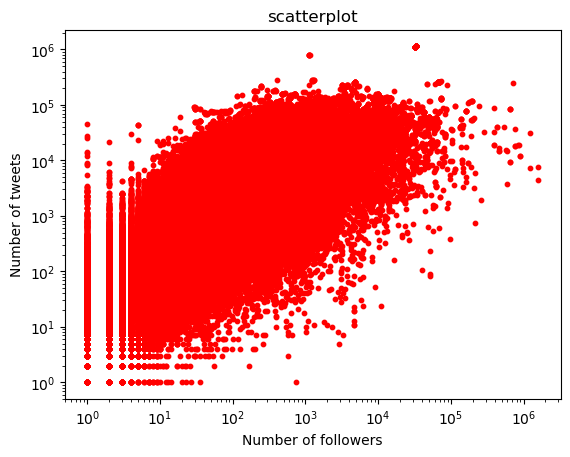

In [92]:
scatterplot(x_data=full_data['tfolow'], y_data=full_data['tst_count'], x_label="Number of followers",
            y_label="Number of tweets", title="scatterplot",
            color="r", x_scaleLog=True, y_scaleLog=True)

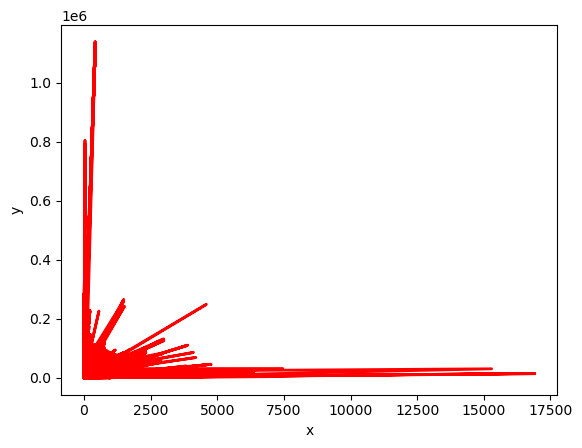

In [93]:
lineplot(x_data=full_data['listcount'], y_data=full_data['tst_count'], x_label='x', y_label='y')

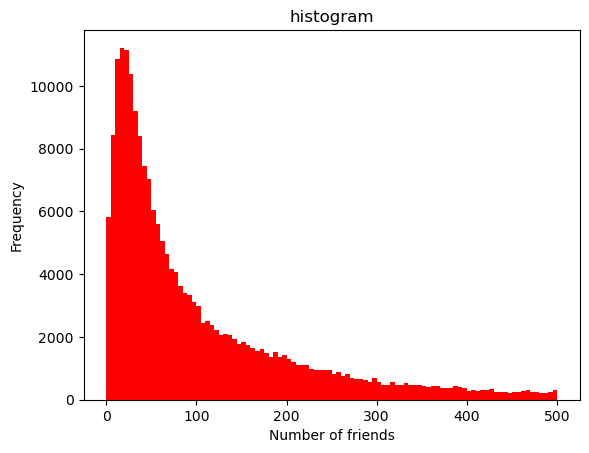

In [94]:
histogram(full_data['tfriends'], bins=100, range=(0, 500), x_label='Number of friends', y_label='Frequency', title='histogram',
          y_scaleLog=False)

In [95]:
listNe = list(negative_data.shape)
y1 = listNe[0]

In [96]:
listPo = positive_data.shape
y2 = listPo[0]

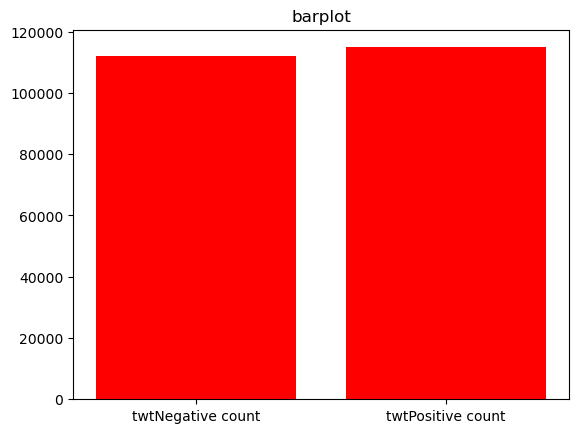

In [97]:
barplot(['twtNegative count', 'twtPositive count'], [y1, y2], title='barplot')

3. Скачать тональные словари


RuSentiLex

In [98]:
rusentilex_list = []
with open('rusentilex_2017.txt', 'r', encoding='utf8') as fp:
    lines = fp.readlines()[18:]
    for i in range(len(lines)):
        line = lines[i].split(', ')
        rusentilex_list.append((line[0], line[3]))
    # print(rusentilex_list)
rusentilex_df = pd.DataFrame.from_records(rusentilex_list, columns=["word", "sentiment"])
rusentilex_df

,word,sentiment
0,аборт,negative
1,абортивный,negative
2,абракадабра,negative
3,абсурд,negative
4,абсурдность,negative
...,...,...
16052,ярый,positive
16053,ясность,positive
16054,ясный,positive
16055,ящур,negative


In [99]:
sentiment_list = rusentilex_df["sentiment"].unique()
sentiment_list

array(['negative', 'neutral', 'positive', 'positive/negative', 'postive',
       'postitive', 'за что деньги', 'opinion\n', 'negative opinion\n',
       'posititve', 'настроение то что нужный', 'fact\n', 'пострадать',
       'feeling\n', 'posiive', 'negaitve', 'negative. fact\n', 'расти',
       'fact \n'], dtype=object)

In [100]:
# удалить экземпляры со смешанной оценкой
for i in sentiment_list:
    if i not in ["positive", "negative"]:
        rusentilex_df = rusentilex_df.drop(rusentilex_df[rusentilex_df.sentiment == i].index)

# преобразовать категориальную переменную в число
encoder = {"sentiment": {"positive": 1, "negative": -1}}
rusentilex_df = rusentilex_df.replace(encoder)
rusentilex_df

,word,sentiment
0,аборт,-1
1,абортивный,-1
2,абракадабра,-1
3,абсурд,-1
4,абсурдность,-1
...,...,...
16052,ярый,1
16053,ясность,1
16054,ясный,1
16055,ящур,-1


WordNetAffect

In [101]:
# загрузить словарь WordNetAffect
import re

wna_list = []
for file_name in ["anger", "disgust", "fear", "sadness", "joy", "surprise"]:
    f = open(file_name + ".txt", "r", encoding="utf8")
    text = f.read()
    word_list = re.findall("[а-яА-Яё]+", text)

    if file_name in ["anger", "disgust", "fear", "sadness"]:
        word_list = [(word, -1) for word in word_list]
    else:
        word_list = [(word, 1) for word in word_list]

    wna_list += word_list

wna_df = pd.DataFrame.from_records(wna_list, columns=["word", "sentiment"])
wna_df

,word,sentiment
0,алчный,-1
1,корыстолюбивый,-1
2,жадный,-1
3,раздражающий,-1
4,навязчивый,-1
...,...,...
2310,невиданно,1
2311,великолепно,1
2312,страшно,1
2313,ужасно,1


In [102]:
linis_df = pd.read_excel("liniscrowd.xlsx")
linis_df.columns = ["word", "sentiment"]
linis_df

,word,sentiment
0,абажур,0
1,абажур,-1
2,абориген,-1
3,абориген,-1
4,абориген,0
...,...,...
26765,яшин,0
26766,ящик,0
26767,ящик,0
26768,ящик,0


In [103]:
linis_sentiment = linis_df['sentiment'].unique()
linis_sentiment

array([ 0, -1, -2,  1,  2], dtype=int64)

In [104]:
for i in linis_sentiment:
    if i not in [1, -1]:
        linis_df = linis_df.drop(linis_df[linis_df.sentiment == i].index)
linis_df

,word,sentiment
1,абажур,-1
2,абориген,-1
3,абориген,-1
7,аборт,-1
10,абортивный,-1
...,...,...
26748,ярость,-1
26751,ярый,-1
26752,ярый,1
26755,ясность,1


In [69]:
linis_df = linis_df.groupby('word').agg('min').reset_index()

In [105]:
linis_df

,word,sentiment
1,абажур,-1
2,абориген,-1
3,абориген,-1
7,аборт,-1
10,абортивный,-1
...,...,...
26748,ярость,-1
26751,ярый,-1
26752,ярый,1
26755,ясность,1


In [106]:
sentiment_dict = pd.concat([rusentilex_df, linis_df, wna_df], ignore_index=True).drop_duplicates()
sentiment_dict

,word,sentiment
0,аборт,-1
1,абортивный,-1
2,абракадабра,-1
3,абсурд,-1
4,абсурдность,-1
...,...,...
25835,великолепно,1
25837,ужасно,1
25838,изумительно,1
25841,дивно,1


In [107]:
# функция предобработки текста
import pymorphy2
from nltk.corpus import stopwords

patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()


def text_preprocess(raw_text):
    raw_text = re.sub(patterns, ' ', raw_text)
    tokens = []
    for token in raw_text.split():
        token = token.lower()
        if token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]

            tokens.append(token)
    return " ".join(tokens)

In [108]:
full_data.drop(['id', 'tdate', 'tname', 'trep', 'trtw', 'tfav', 'tst_count', 'tfolow', 'tfriends', 'listcount'], axis=1,
               inplace=True)
full_data

,ttext,ttype
0,на работе был полный пиддес :| и так каждое за...,-1
1,"Коллеги сидят рубятся в Urban terror, а я из-з...",-1
2,@elina_4post как говорят обещаного три года жд...,-1
3,"Желаю хорошего полёта и удачной посадки,я буду...",-1
4,"Обновил за каким-то лешим surf, теперь не рабо...",-1
...,...,...
114906,"Спала в родительском доме, на своей кровати......",1
114907,RT @jebesilofyt: Эх... Мы немного решили сокра...,1
114908,"Что происходит со мной, когда в эфире #proacti...",1
114909,"""Любимая,я подарю тебе эту звезду..."" Имя како...",1


In [109]:
# отделить сообщения от набора данных
split_data = full_data.sample(5000)
split_data = split_data.reset_index(drop=True)
split_data

,ttext,ttype
0,"@noliquid Гм-гм. Все понял. Значит, я не ошибс...",-1
1,"Мой блендер постирал бы лучше, чем наша стирал...",1
2,как дальше жить? как дальше быть? как мне любо...,-1
3,"и последняя, Горохова, светленькая..чем-то на ...",-1
4,RT @AlenaMeow1D: Не надо так((((( http://t.co/...,-1
...,...,...
4995,@MaxsYakovenko уууу.если это конфета.то я ее х...,1
4996,"@DanilaF1re я не знаю, что постить q.q\nМожно ...",1
4997,“@Aleks_SPb: Докатились((((\nПолитиком года в ...,-1
4998,"@skochdopol12 через тебе, взагалі-то (((але мо...",-1


In [110]:
split_data['clean_text'] = split_data['ttext'].map(text_preprocess)

In [111]:
split_data['clean_text']

0       гм гм понять значит ошибиться очень очень грус...
1       блендер постирать наш стиральный машинка новый...
2       далёкий жить далёкий любовь твой забыть скучат...
3       последний горохов светленький ромкина юля похожий
4                                                        
                              ...                        
4995      уууа это конфета хотеть похожий яблоко карамела
4996                 знать постить просто картинка музыка
4997    “ докатиться политик год питер лидировать рыжи...
4998                        ты взагалі але мама довольный
4999                   смотреть каблук ниже олег блин что
Name: clean_text, Length: 5000, dtype: object

In [112]:
split_data['tokens'] = split_data.apply(lambda row: word_tokenize(row['clean_text']), axis=1)

In [113]:
split_data

,ttext,ttype,clean_text,tokens
0,"@noliquid Гм-гм. Все понял. Значит, я не ошибс...",-1,гм гм понять значит ошибиться очень очень грус...,"[гм, гм, понять, значит, ошибиться, очень, оче..."
1,"Мой блендер постирал бы лучше, чем наша стирал...",1,блендер постирать наш стиральный машинка новый...,"[блендер, постирать, наш, стиральный, машинка,..."
2,как дальше жить? как дальше быть? как мне любо...,-1,далёкий жить далёкий любовь твой забыть скучат...,"[далёкий, жить, далёкий, любовь, твой, забыть,..."
3,"и последняя, Горохова, светленькая..чем-то на ...",-1,последний горохов светленький ромкина юля похожий,"[последний, горохов, светленький, ромкина, юля..."
4,RT @AlenaMeow1D: Не надо так((((( http://t.co/...,-1,,[]
...,...,...,...,...
4995,@MaxsYakovenko уууу.если это конфета.то я ее х...,1,уууа это конфета хотеть похожий яблоко карамела,"[уууа, это, конфета, хотеть, похожий, яблоко, ..."
4996,"@DanilaF1re я не знаю, что постить q.q\nМожно ...",1,знать постить просто картинка музыка,"[знать, постить, просто, картинка, музыка]"
4997,“@Aleks_SPb: Докатились((((\nПолитиком года в ...,-1,“ докатиться политик год питер лидировать рыжи...,"[“, докатиться, политик, год, питер, лидироват..."
4998,"@skochdopol12 через тебе, взагалі-то (((але мо...",-1,ты взагалі але мама довольный,"[ты, взагалі, але, мама, довольный]"


In [115]:
split_data.drop(split_data[split_data['clean_text'] == ''].index, inplace=True)
split_data = split_data.reset_index(drop=True)
split_data

,ttext,ttype,clean_text,tokens
0,"@noliquid Гм-гм. Все понял. Значит, я не ошибс...",-1,гм гм понять значит ошибиться очень очень грус...,"[гм, гм, понять, значит, ошибиться, очень, оче..."
1,"Мой блендер постирал бы лучше, чем наша стирал...",1,блендер постирать наш стиральный машинка новый...,"[блендер, постирать, наш, стиральный, машинка,..."
2,как дальше жить? как дальше быть? как мне любо...,-1,далёкий жить далёкий любовь твой забыть скучат...,"[далёкий, жить, далёкий, любовь, твой, забыть,..."
3,"и последняя, Горохова, светленькая..чем-то на ...",-1,последний горохов светленький ромкина юля похожий,"[последний, горохов, светленький, ромкина, юля..."
4,@teryash это было давно и не правда ахаха ну б...,-1,это давно правда ахах блин каждый сериал боль ...,"[это, давно, правда, ахах, блин, каждый, сериа..."
...,...,...,...,...
4987,@MaxsYakovenko уууу.если это конфета.то я ее х...,1,уууа это конфета хотеть похожий яблоко карамела,"[уууа, это, конфета, хотеть, похожий, яблоко, ..."
4988,"@DanilaF1re я не знаю, что постить q.q\nМожно ...",1,знать постить просто картинка музыка,"[знать, постить, просто, картинка, музыка]"
4989,“@Aleks_SPb: Докатились((((\nПолитиком года в ...,-1,“ докатиться политик год питер лидировать рыжи...,"[“, докатиться, политик, год, питер, лидироват..."
4990,"@skochdopol12 через тебе, взагалі-то (((але мо...",-1,ты взагалі але мама довольный,"[ты, взагалі, але, мама, довольный]"


In [117]:
# создать список сентимента сообщения

def sentiment_of_word(word):
    result = sentiment_dict.loc[sentiment_dict['word'] == word]
    if len(result) == 0:
        return 0
    else:
        return result.iloc[0]["sentiment"]


def sentiment_of_token(tokens):
    return [sentiment_of_word(token) for token in tokens]

In [123]:
split_data["sentiments"] = split_data.apply(lambda row: sentiment_of_token(row["tokens"]), axis=1)
split_data

,ttext,ttype,clean_text,tokens,sentiments
0,"@noliquid Гм-гм. Все понял. Значит, я не ошибс...",-1,гм гм понять значит ошибиться очень очень грус...,"[гм, гм, понять, значит, ошибиться, очень, оче...","[0, 0, 1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 0]"
1,"Мой блендер постирал бы лучше, чем наша стирал...",1,блендер постирать наш стиральный машинка новый...,"[блендер, постирать, наш, стиральный, машинка,...","[0, 0, 1, 0, 1, 1, 0]"
2,как дальше жить? как дальше быть? как мне любо...,-1,далёкий жить далёкий любовь твой забыть скучат...,"[далёкий, жить, далёкий, любовь, твой, забыть,...","[0, 0, 0, 1, 0, 0, -1, 1, 1, 1, -1]"
3,"и последняя, Горохова, светленькая..чем-то на ...",-1,последний горохов светленький ромкина юля похожий,"[последний, горохов, светленький, ромкина, юля...","[0, 0, 1, 0, 0, 0]"
4,@teryash это было давно и не правда ахаха ну б...,-1,это давно правда ахах блин каждый сериал боль ...,"[это, давно, правда, ахах, блин, каждый, сериа...","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0]"
...,...,...,...,...,...
4987,@MaxsYakovenko уууу.если это конфета.то я ее х...,1,уууа это конфета хотеть похожий яблоко карамела,"[уууа, это, конфета, хотеть, похожий, яблоко, ...","[0, 0, 0, 0, 0, 0, 0]"
4988,"@DanilaF1re я не знаю, что постить q.q\nМожно ...",1,знать постить просто картинка музыка,"[знать, постить, просто, картинка, музыка]","[0, 0, 0, 0, 0]"
4989,“@Aleks_SPb: Докатились((((\nПолитиком года в ...,-1,“ докатиться политик год питер лидировать рыжи...,"[“, докатиться, политик, год, питер, лидироват...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 1, 1]"
4990,"@skochdopol12 через тебе, взагалі-то (((але мо...",-1,ты взагалі але мама довольный,"[ты, взагалі, але, мама, довольный]","[0, 0, 0, 0, 1]"


In [125]:
X_dict = pd.DataFrame()
X_dict["positive"] = split_data.apply(lambda row: sum(i == 1 for i in row["sentiments"]), axis=1)
X_dict["negative"] = split_data.apply(lambda row: sum(i == -1 for i in row["sentiments"]), axis=1)
X_dict["max_positive"] = split_data.apply(lambda row:max(row["sentiments"]),axis=1)
X_dict["max_negative"] = split_data.apply(lambda row:min(row["sentiments"]),axis=1)
X_dict["avg_sentiments"] = split_data.apply(lambda row: sum(row["sentiments"]) / len(row["sentiments"]), axis=1)

In [126]:
X_dict

,positive,negative,max_positive,max_negative,avg_sentiments
0,2,3,1,-1,-0.071429
1,3,0,1,0,0.428571
2,4,2,1,-1,0.181818
3,1,0,1,0,0.166667
4,0,2,0,-1,-0.200000
...,...,...,...,...,...
4987,0,0,0,0,0.000000
4988,0,0,0,0,0.000000
4989,3,1,1,-1,0.125000
4990,1,0,1,0,0.200000


In [128]:
split_data.to_csv("split_data_with_sentiments.csv", index=False)

In [129]:
X_dict.to_csv("X_dict.csv", index=False)

BOW

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = split_data["clean_text"]
X_bow = vectorizer.fit_transform(corpus).toarray()
X_bow = pd.DataFrame(X_bow)
X_bow.to_csv("X_bow.csv", index=False)

In [130]:
X_bow.shape

(4992, 9549)

TFIDF

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
corpus = split_data["clean_text"]
X_tfidf = vectorizer.fit_transform(corpus).toarray()
X_tfidf = pd.DataFrame(X_tfidf)
X_tfidf.to_csv("X_tfidf.csv", index=False)

In [132]:
X_tfidf.shape

(4992, 9549)